# *History of World Happiness Report*

In July 2011, the UN General Assembly adopted resolution 65/309 Happiness: Towards a Holistic Definition of Developmentinviting member countries to measure the happiness of their people and to use the data to help guide public policy. On April 2, 2012, this was followed by the first UN High Level Meeting called Wellbeing and Happiness: Defining a New Economic Paradigm, which was chaired by UN Secretary General Ban Ki-moon and Prime Minister Jigme Thinley of Bhutan, a nation that adopted gross national happiness instead of gross domestic product as their main development indicator.

The first World Happiness Report was released on April 1, 2012 as a foundational text for the UN High Level Meeting: Well-being and Happiness: Defining a New Economic Paradigm. drawing international attention.The report outlined the state of world happiness, causes of happiness and misery, and policy implications highlighted by case studies. In 2013, the second World Happiness Report was issued, and since then has been issued on an annual basis with the exception of 2014.The report primarily uses data from the Gallup World Poll. Each annual report is available to the public to download on the World Happiness Report website.

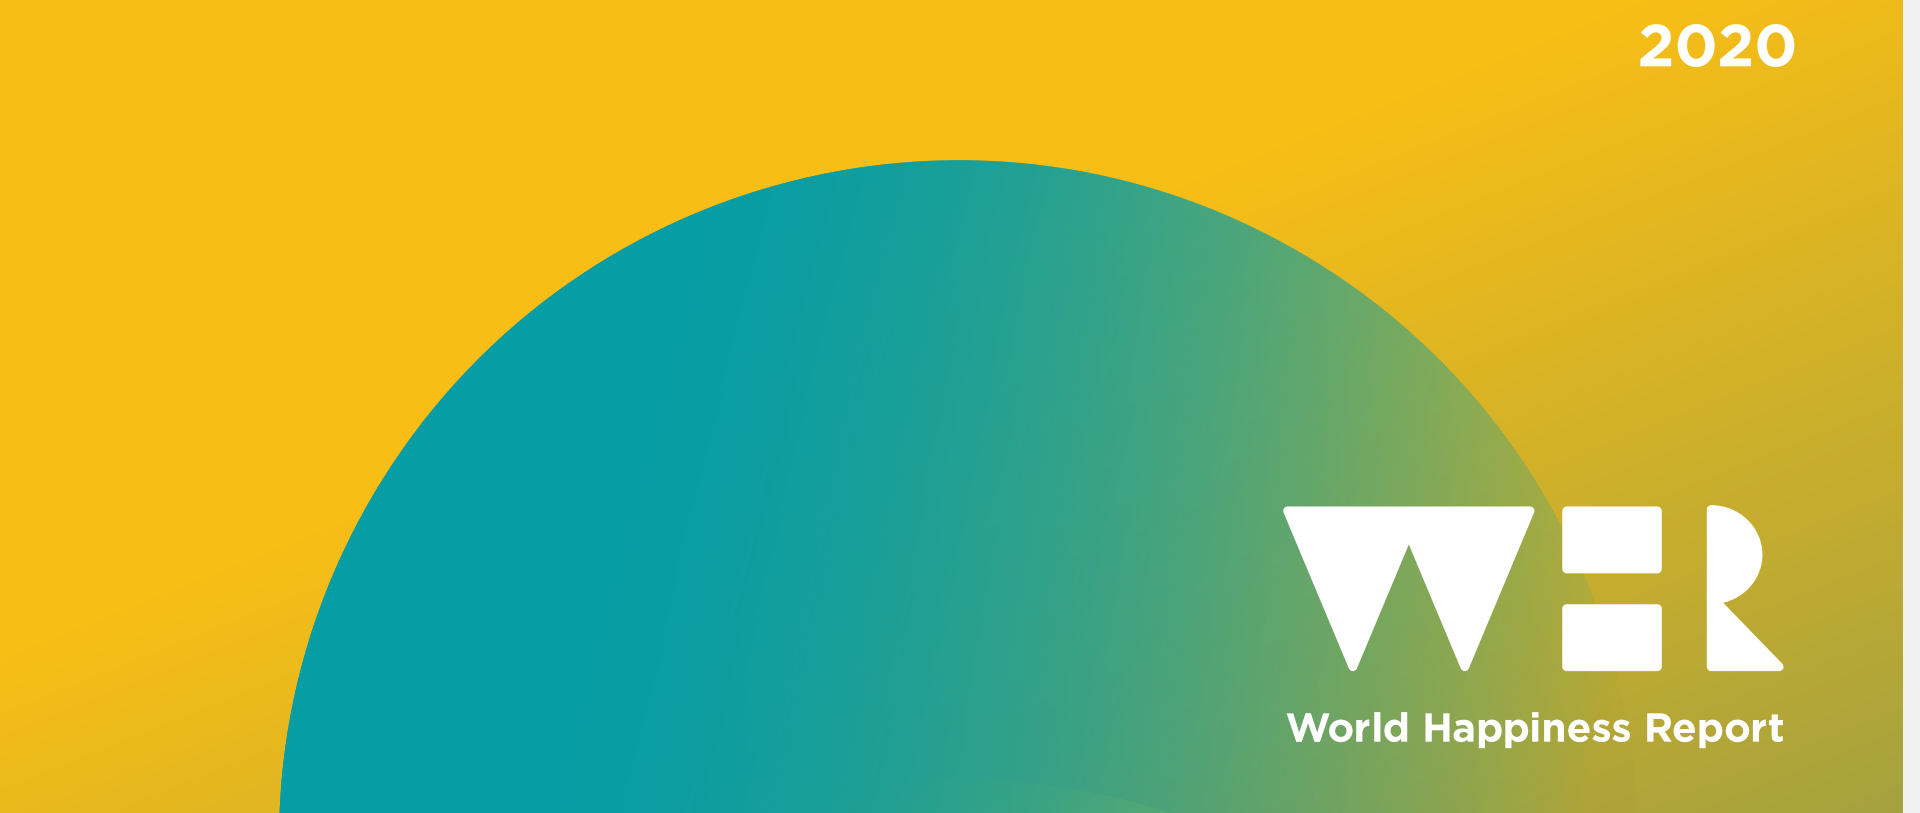

#  INTRODUCTION
Hi fellow kagglers, this kernel is made to introduce you to one of the most famous visualization library, **Plotly**. We will also learn about one of the most famous datasets - **World Happiness Report.**

So what is the World Happiness Report ? In a nutshell, it is a metric which measures the happiness of people in their respective countries. 


In [ ]:
pip install chart_studio

In [ ]:
# Importing all the required libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import chart_studio.plotly as py
import collections
from plotly.offline import init_notebook_mode , iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go 

import seaborn as sns
#from collections import counter
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Reading the files and checking out the data .

In [ ]:
report2020=pd.read_csv('../input/world-happiness-report/2020.csv')
report2019=pd.read_csv('../input/world-happiness-report/2019.csv')
report2018=pd.read_csv('../input/world-happiness-report/2018.csv')

In [ ]:
report2020.head()

In [ ]:
report2020.info()

In [ ]:
report2019.head()

In [ ]:
report2019.info()

In [ ]:
report2018.head()

In [ ]:
report2018.info()

Okay , so as you can see the problem lies in the fact that the report of 2020 has more information than 2019 and 2018 datasets. So I will try to rename and adjust the columns of the dataframe of previous years. This is done so that we can perform operations on the columns ,(if the name has spaces , we cannot use it !!)

In [ ]:
report2018.rename(columns ={'Overall rank': 'Overall_rank',
                            'Country or region':'Country_region',
                            'GDP per capita':'GDP_per_capita',
                           'Social support': 'Social_support',
                           'Healthy life expectancy' : 'Healthy_life_expectancy',
                           'Freedom to make life choices':'Freedom',
                           'Perceptions of corruption':'Corruption'}, inplace=True)
report2018.head()

There looks better.

In [ ]:
report2019.rename(columns ={'Overall rank': 'Overall_rank',
                            'Country or region':'Country_region',
                            'GDP per capita':'GDP_per_capita',
                           'Social support': 'Social_support',
                           'Healthy life expectancy' : 'Healthy_life_expectancy',
                           'Freedom to make life choices':'Freedom',
                           'Perceptions of corruption':'Corruption'}, inplace=True)
report2019.head()
print(report2019.Country_region)

In [ ]:
report2020.head()

In [ ]:
report2020.insert(0,"Overall_Rank",np.arange(153)+1, True)
report2020.head()

Inserting an Overall Rank , as in the previous datasets .

In [ ]:
report2020.rename(columns ={'Country name':'Country_name',
                            'Logged GDP per capita':'GDP_per_capita',
                           'Social support': 'Social_support',
                           'Healthy life expectancy' : 'Healthy_life_expectancy',
                           'Freedom to make life choices':'Freedom',
                           'Perceptions of corruption':'Corruption',
                            'Regional indicator': 'Regional_indicator',
                           'Ladder score':'Score'}, inplace=True)

In [ ]:
report2020.head()

Making a heatmap among all the factors.

In [ ]:
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(report2020.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)

In [ ]:
x2020 = report2020['Country_name']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color = 'black',
                          width = 512,
                          height = 384
                         ).generate(" ".join(x2020))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# STRIP PLOT
A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:
Horizontal axis = the value of the response variable;
Verticalal axis = all values are set to 1.
That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).

In [ ]:
x = sns.stripplot(x = "Regional_indicator", y = "Score", data = report2020, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", color = 'blue', fontsize = 15)
plt.show()

In [ ]:
report2020.mean()

In [ ]:
report2019.mean()

Well , I was hoping that we could ascertain something with the mean values of different years . However , it seems that the recent report has only 163 entries where as past has 165 . Plus things are formatted differently in the years.

In [ ]:
# We have taken the mean for application of the same .
above_mean_HS =['Above World Average' if i >= 5.40 else 'Below World Average' for i in report2020.Score]
df = pd.DataFrame({'Happiness_Score' : above_mean_HS})
sns.countplot(x = df.Happiness_Score)
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Happiness Score Average', color = 'blue', fontsize = 15)
plt.show()

Here comes the power of Plotly , the above visualization were made with Seaborn , which does provide beautiful graphs , however the graphs made with Plotly are much more interactive in the nature , ( In the top right side of the visualization , you will see a lot of options !!)

[https://www.youtube.com/watch?v=87jyeklhTH8]


# BOX AND WHISKERS PLOT 
A Box and Whisker Plot (or Box Plot) is a convenient way of visually displaying the data distribution through their quartiles.

The lines extending parallel from the boxes are known as the “whiskers”, which are used to indicate variability outside the upper and lower quartiles. Outliers are sometimes plotted as individual dots that are in-line with whiskers. Box Plots can be drawn either vertically or horizontally.

In [ ]:
trace1 = go.Box(
    y = report2020.GDP_per_capita ,
    name = 'GDP per Capita of  Countries in 2020',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace2 = go.Box(
    y = report2020.Corruption,
    name = 'Government Corruption Index in 2020',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace1, trace2]
iplot(data)

# SCATTER PLOT
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.



In [ ]:
dataframe = report2020

trace1 = go.Scatter(
    x = dataframe.Score,
    y = dataframe.GDP_per_capita,
    name = "Economy",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )
# second line plot
trace2 = go.Scatter(
    x = dataframe.Overall_Rank,
    y = dataframe.Corruption,
    xaxis = 'x2',
    yaxis = 'y2',
    name = "Gov. Corruption",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)')
                    )
data = [trace1, trace2]
layout = go.Layout(
        xaxis2 = dict(
            domain = [0.65, 0.95],
            anchor = 'y2'        
                     ),
        yaxis2 = dict(
            domain = [0.65, 0.95],
            anchor = 'x2'
                     ),
    title = 'Economy and Government Corruption Correlation'
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
import plotly.figure_factory as ff

dataframe = report2020
dt2020 = dataframe.loc[:,["GDP_per_capita", "Healthy_life_expectancy", "Freedom"]]
dt2020["index"] = np.arange(1, len(dt2020) + 1)

fig = ff.create_scatterplotmatrix(dt2020, diag = 'box', index = 'index', colormap = 'Portland',
                                  colormap_type = 'cat',
                                  height = 700, width = 700)
iplot(fig)

In [ ]:

trace1 = go.Scatter3d(
    x = dataframe.GDP_per_capita,
    y = dataframe.Freedom,
    z = dataframe.Healthy_life_expectancy,
    mode = 'markers',
    marker = dict(
        size = 7,
        color = 'rgb(255,132,12)'     
                 )
                      )
data = [trace1]
layout = go.Layout(
    title = 'Happiness Status According to the Economy, Freedom and Health',
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 30  
                )
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
dataframe = report2020
trace1 = go.Scatter(
    x = dataframe.Overall_Rank,
    y = dataframe.GDP_per_capita,
    name = "GDP per Capita"
                    )
trace2 = go.Scatter(
    x = dataframe.Overall_Rank,
    y = dataframe.Healthy_life_expectancy,
    xaxis = 'x2',
    yaxis = 'y2',
    name = "Health"
                    )
trace3 = go.Scatter(
    x = dataframe.Overall_Rank,
    y = dataframe.Freedom,
    xaxis = 'x3',
    yaxis = 'y3',
    name = "Freedom"
)
trace4 = go.Scatter(
    x = dataframe.Overall_Rank,
    y = dataframe.Corruption,
    xaxis = 'x4',
    yaxis = 'y4',
    name = "Gov. Corruption"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis = dict(
        domain = [0, 0.45]
                ),
    yaxis = dict(
        domain = [0, 0.45]
                ),
    xaxis2 = dict(
        domain = [0.55, 1]
                 ),
    xaxis3 = dict(
        domain = [0, 0.45],
        anchor = 'y3'
                 ),
    xaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'y4'
                 ),
    yaxis2 = dict(
        domain = [0, 0.45],
        anchor = 'x2'
                 ),
    yaxis3 = dict(
        domain = [0.55, 1]
                 ),
    yaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'x4'
                 ),
    title = 'GDP per Capita, Health, Freedom and Gov. Corruption Effect in Happiness Rank of Countries'
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
df = report2020.iloc[:100, :]

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df.Overall_Rank,
                    y = df.GDP_per_capita,
                    mode = "lines + markers",
                    name = "GDP per Capita",
                    marker = dict(color = 'rgba(55, 20, 50, 0.9)'),
                    text = df.Country_name
                    )
trace2 = go.Scatter(
                    x = df.Overall_Rank,
                    y = df.Freedom,
                    mode = "lines + markers",
                    name = "Freedom",
                    marker = dict(color = 'rgba(10, 180, 80, 0.9)'),
                    text = df.Country_name
                    )

data = [trace1, trace2]
layout = dict(title = 'Economy and Freedom Relations in Happiness Rank Top 100 Countries',
             xaxis = dict(title = 'Happiness Rank', ticklen = 5, zeroline = True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
df2018 = report2018.iloc[:30, :]  
df2019 = report2019.iloc[:30, :]
df2020 = report2020.iloc[:30, :]

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df2018.Country_region,
                    y = df2018.Freedom,
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'rgba(55, 20, 50, 0.8)'),
                    text = df2018.Overall_rank
                    )

trace2 = go.Scatter(
                    x = df2019.Country_region,
                    y = df2019.Freedom,
                    mode = "markers",
                    name = "2019',
                    marker = dict(color = 'rgba(10, 180, 80, 0.8)'),
                    text = df2019.Overall_rank
                    )

trace3 = go.Scatter(
                    x = df2020.Country_name,
                    y = df2020.Freedom,
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = df2020.Overall_Rank
                    )
data = [trace1, trace2, trace3]
layout = dict(title = 'Freedom vs Happiness Rank of Top 30 Countries in 2018, 2019 and 2020 Years',
             xaxis = dict(tickangle = 315, ticklen = 3, zeroline = False),
             yaxis = dict(title = 'Freedom', ticklen = 3, zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
data = dict(type = 'choropleth', 
           locations = report2020['Country_name'],
           locationmode = 'country names',
           z = report2020['Overall_Rank'],
           colorbar = {'title':'Happiness Scale'})
layout = dict(title = 'Global Happiness Ranking', 
             geo = dict(showframe = False, 
                       projection = {'type': 'natural earth'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)


<div class="tenor-gif-embed" data-postid="16449755" data-share-method="host" data-width="100%" data-aspect-ratio="1.0"><a href="https://tenor.com/view/thank-you-for-your-time-shea-whigham-thomas-carrasco-homecoming-iappreciate-your-time-gif-16449755">Thank You For Your Time Shea Whigham GIF</a> from <a href="https://tenor.com/search/thankyouforyourtime-gifs">Thankyouforyourtime GIFs</a></div><script type="text/javascript" async src="https://tenor.com/embed.js"></script>

Well , I hope you learnt something useful!

References-https://www.kaggle.com/saviola07/world-happiness-report-analysis